In [262]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [263]:
data_table = pd.read_csv('Modified_Irrigation.csv')
# ship_table.head(2)

In [264]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [265]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_dataset = data_table.dropna()
adjusted_dataset = adjusted_dataset.reset_index(drop=True)

# adjusted_dataset.info()
# adjusted_dataset.columns
# adjusted_dataset.corr(method='pearson', numeric_only=True)

In [266]:
feature1 = 'moisture'
feature2 = 'temp'

k_mean_df = adjusted_dataset[[feature1, feature2]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

,moisture,temp
195,941,13
196,902,45
197,894,42
198,1022,45
199,979,10


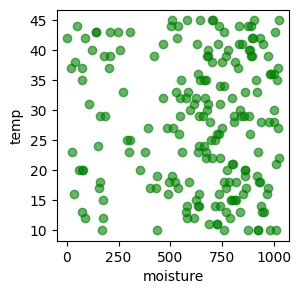

In [267]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
ax.set_ylabel(feature2)
ax.set_xlabel(feature1)
plt.show()

In [268]:
# centroid = np.array([k_mean_df[feature1].mean(), k_mean_df[feature2].mean()])
# print(centroid)
# # k = 1
# fig, ax = plt.subplots(figsize=(3, 3))
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], color='green', alpha=0.6)
# ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [269]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  return random.randint(min.astype(np.int64), max.astype(np.int64))

# number_centroids = 2
# centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])
# print(centroids)

In [270]:
# distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
# print(distances_centroids)

In [271]:
# # Get Nearest Centroid for each point
# index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
# # print(index_centroids)
# k_mean_df['nearest_centroids'] = index_centroids[:, 0]
# wcss = index_centroids[:, 1].sum()
# # print(wcss)

In [272]:
# # fig, ax = plt.subplots(figsize=(8, 8))
# fig, ax = plt.subplots()

# # Datasets
# ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# # Centroids
# centroid_x = centroids[:, 0]
# centroid_y = centroids[:, 1]
# colors = ['black', 'green', 'blue']
# plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

# # plt.colorbar(ax)
# # Labels
# ax.set_xlabel(feature1)
# ax.set_ylabel(feature2)
# plt.show()

In [273]:
# NEW Centroids


# new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
# centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
# print(new_centroids)
# print(centroids)

In [274]:
# # termination criterion

# itr = 1
# while (True):
#   print(itr)

#   # Computer Distance for each centroid
#   distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])

#   # NEW for WCSS
#   index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
#   k_mean_df['nearest_centroids'] = index_centroids[:, 0]

#   print(wcss)
#   # print(distances_centroids.sum()) # old termination criterion

#   # fig, ax = plt.subplots(figsize=(2,2))
#   fig, ax = plt.subplots()
#   # Datasets
#   ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
#   # Centroids
#   centroid_x = centroids[:, 0]
#   centroid_y = centroids[:, 1]
#   plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)
#   # labels
#   ax.set_xlabel(feature1)
#   ax.set_ylabel(feature2)
#   plt.show()

#   # NEW Centroids 
#   new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
#   centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])

#   itr+=1
  
#   # wcss termination criterion  
#   if (wcss == index_centroids[:, 1].sum()):
#     print(index_centroids[:, 1].sum())
#     break
#   wcss = index_centroids[:, 1].sum()

In [275]:
# print(k_mean_df.groupby(by=['nearest_centroids']).count())
# print(adjusted_dataset.groupby(by=['pump']).count())

In [ ]:
# One for loop

for k in range(1,6):
  print(k, 'number of centroids')
  number_centroids = k
  centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

  itr = 1
  while (True):
    print(itr)

    # Computer Distance for each centroid
    distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])

    # NEW for WCSS
    index_centroids = np.array([[x.argmin(), x[x.argmin()]] for x in distances_centroids])
    k_mean_df['nearest_centroids'] = index_centroids[:, 0]

    print(wcss)
    # print(distances_centroids.sum()) # old termination criterion

    # Visualization
    fig, ax = plt.subplots(figsize=(2,2))
    # fig, ax = plt.subplots()
    # Datasets
    ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
    # Centroids
    centroid_x = centroids[:, 0]
    centroid_y = centroids[:, 1]
    plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)
    # labels
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    plt.show()

    # NEW Centroids 
    new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
    centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])

    itr+=1

    # wcss termination criterion  
    if (wcss == index_centroids[:, 1].sum()):
      print(index_centroids[:, 1].sum())
      break
    wcss = index_centroids[:, 1].sum()
  
  print(k_mean_df.groupby(by=['nearest_centroids']).count())
  print(adjusted_dataset.groupby(by=['pump']).count())

1 number of centroids
1
9687.53743376915
2
78743.95234759117
3
45183.732868777064
45183.732868777064
                   moisture  temp
nearest_centroids                
0.0                     200   200
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
2 number of centroids
1
45183.732868777064
2
27579.374967217325
3
25580.06291485983
4
25406.94097753718
5
25217.40499686101
6
25125.14456951765
7
25075.256433183822
8
24960.86742818057
9
24904.56828473103
24904.56828473103
                   moisture  temp
nearest_centroids                
0.0                      50    50
1.0                     150   150
      crop  moisture  temp
pump                      
0       50        50    50
1      150       150   150
3 number of centroids
1
24904.56828473103
2
28596.17649924925
3
23810.388676977214
4
20303.930699394812
5
18004.805342437197
6
16264.979488448169
7
15621.038343655917
8
15394.055482584728
9
15366.154782859961
10
15375.9229